In [1]:
# Class4-Statistics-Week15
# pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic= sns.load_dataset('titanic')
df = titanic.copy()
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Değişkenlerin veri türlerini yazınız

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


# Nicel verileri describe methodu ile inceleyiniz ve verileri ortalamasi, standart sapmasi ve ceyrekliklerine bakarak aykirilik olup olmadıgini ve normal dagilip dagilmadigi konusunda yorumda bulunun.

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [5]:
# Herhangi bir veri setinde verilerin normal dagilima sahip olup olmadigi mean(ortalama) ve median(ortanca-%50) degerlerinin 
# birbirlerine yakın veya uzak olmasından anlasilabilir.
# Mean ve median eger birbirlerine yakinsa normal dagilim, degilse normal dagilim gostermez diyebiliriz.
# Yukaridaki tablodaki nicel verilere baktigimizda 'age' in normal dagilim gosterdigini soyleyebiliriz.

# Nitel verilerin dtype larını kategorik yapın

In [6]:
un_catego = df.select_dtypes(include=["object","bool"])
un_catego

,sex,embarked,who,adult_male,embark_town,alive,alone
0,male,S,man,True,Southampton,no,False
1,female,C,woman,False,Cherbourg,yes,False
2,female,S,woman,False,Southampton,yes,True
3,female,S,woman,False,Southampton,yes,False
4,male,S,man,True,Southampton,no,True
...,...,...,...,...,...,...,...
886,male,S,man,True,Southampton,no,True
887,female,S,woman,False,Southampton,yes,True
888,female,S,woman,False,Southampton,no,False
889,male,C,man,True,Cherbourg,yes,True


In [7]:
df.sex = df.sex.astype("category")
df.embarked = df.embarked.astype("category")
df.who = df.who.astype("category")
df.adult_male = df.adult_male.astype("category")
df.embark_town = df.embark_town.astype("category")
df.alive = df.alive.astype("category")
df.alone = df.alone.astype("category")

In [8]:
df_category = df.select_dtypes(include="category")
df_category

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,male,S,Third,man,True,NaN,Southampton,no,False
1,female,C,First,woman,False,C,Cherbourg,yes,False
2,female,S,Third,woman,False,NaN,Southampton,yes,True
3,female,S,First,woman,False,C,Southampton,yes,False
4,male,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...
886,male,S,Second,man,True,NaN,Southampton,no,True
887,female,S,First,woman,False,B,Southampton,yes,True
888,female,S,Third,woman,False,NaN,Southampton,no,False
889,male,C,First,man,True,C,Cherbourg,yes,True


# sex ve class değişkenlerini Label Encoder veya Dummies yontemiyle sayisal verilere donusturünuz.

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

In [11]:
df.sex = labelencoder.fit_transform(df.sex)
df.sex.value_counts()

1    577
0    314
Name: sex, dtype: int64

In [12]:
df["class"] = labelencoder.fit_transform(df["class"])
df["class"].value_counts()

2    491
0    216
1    184
Name: class, dtype: int64

# age ve fare değişkenlerinin normalliklerini inceleyiniz.

In [13]:
import pandas as pd
from scipy.stats import norm

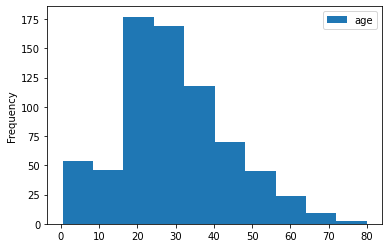

In [14]:
pd.DataFrame(df.age).plot.hist();

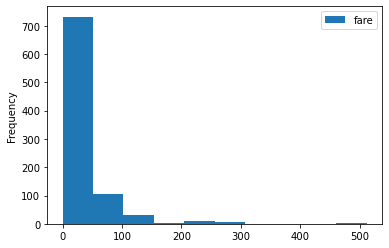

In [15]:
pd.DataFrame(df.fare).plot.hist();

In [16]:
from scipy.stats import normaltest
test_value,p_value=normaltest(df.fare)
p_value
# the pvalue is bigger than 0.05, it has normal distribution.

3.727091062842147e-197

In [17]:
test_value,p_value=normaltest(df.age.dropna())
p_value
# the pvalue is less than 0.05, it has not normal distribution.

0.00011709599657350757

# HIPOTEZ TESTI
# H0 hipotezi Titanik kazasında insanlarin sosyo ekonomik siniflari hayatta kalma oranlarına herhangi bir etkisi yoktur.
# H1 hipotezi Titanik kazasında insanlarin sosyo ekonomik siniflari hayatta kalma oranlarına herhangi bir etkisi vardır.

In [18]:
from scipy.stats import normaltest
from scipy.stats import shapiro
from statsmodels.stats.proportion import proportions_ztest

In [19]:
df["alive"]=labelencoder.fit_transform(df["alive"])

In [20]:
K = df["class"]
L = df["alive"]
K_L = pd.concat([K, L], axis = 1)
K_L.columns = ["K","L"]

K_L.head()

,K,L
0,2,0
1,0,1
2,2,1
3,0,1
4,2,0


In [21]:
K = df["class"]
K = df["alive"]
# K ve K'nın grubu
GRUP_K = np.arange(len(K))
GRUP_K = pd.DataFrame(GRUP_K)
GRUP_K[:] = "K"
A = pd.concat([K, GRUP_K], axis = 1)

# L ve L'nin Grubu
GRUP_L = np.arange(len(L))
GRUP_L = pd.DataFrame(GRUP_L)
GRUP_L[:] = "L"
L = pd.concat([L, GRUP_L], axis = 1)

# Tum veri
KL = pd.concat([K,L])

KL.head()

,0,alive
0,0,NaN
1,1,NaN
2,1,NaN
3,1,NaN
4,0,NaN


In [22]:
KL.tail()

,0,alive
886,L,0.0
887,L,1.0
888,L,0.0
889,L,1.0
890,L,0.0


In [23]:
shapiro(K_L.K)

ShapiroResult(statistic=0.7183380126953125, pvalue=3.3958725291830076e-36)

In [24]:
import scipy.stats as stats

In [25]:
stats.levene(K_L.K, K_L.L)

LeveneResult(statistic=90.04223321250018, pvalue=7.189908883210466e-21)

In [ ]:
# pvalue 0.05 den kucuk oldugu icin H0 hipotezi red edilir. Dolayisiyla H1 kabul edilmis olur.
# H1 hipotezi Titanik kazasında insanlarin sosyo ekonomik siniflari hayatta kalma oranlarına herhangi bir etkisi vardır.